In [1]:
import os, dotenv

dotenv.load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["COMPOSIO_API_KEY"] = os.getenv("COMPOSIO_API_KEY")

In [2]:
from langgraph.pregel.remote import RemoteGraph

remote_graph = RemoteGraph("aztrogent", url="http://127.0.0.1:2024")

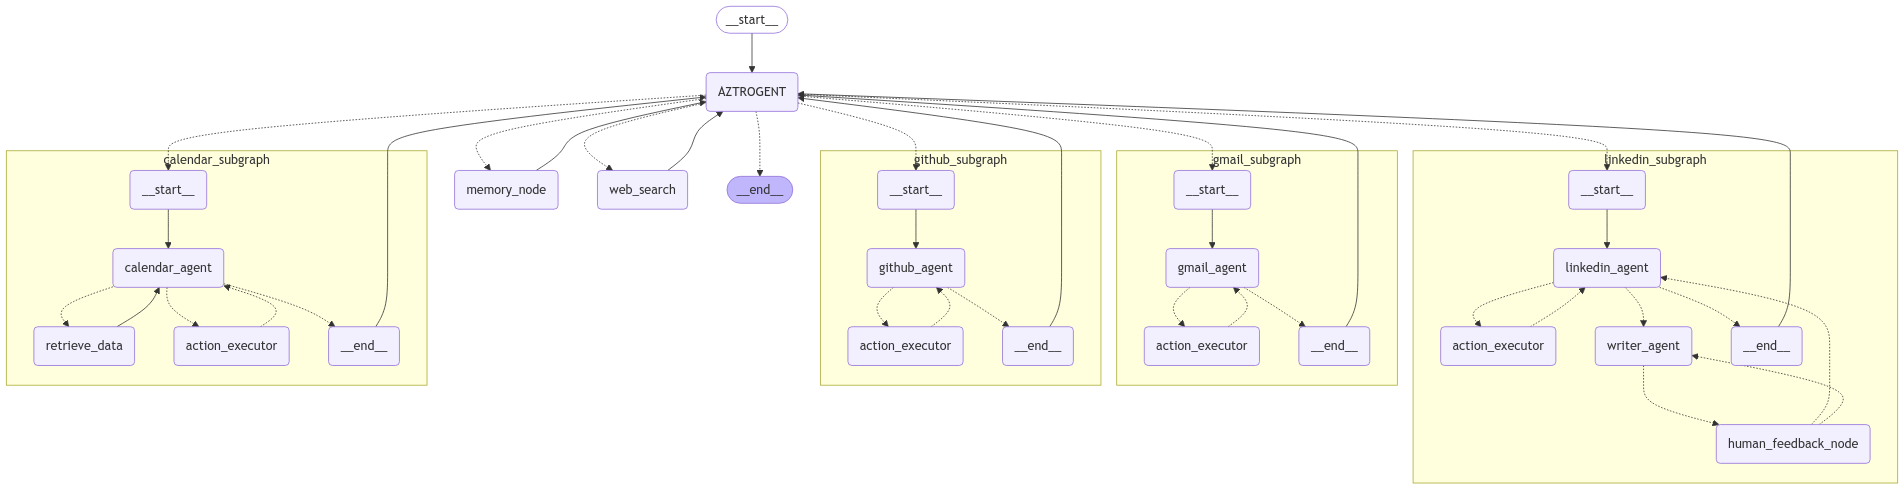

In [6]:
from IPython.display import Image, display

display(Image(remote_graph.get_graph(xray=1).draw_mermaid_png()))

In [ ]:
from langchain_core.messages import HumanMessage
import uuid

thread_id = str(uuid.uuid4())
config = {"configurable": {"thread_id": thread_id}}
    # Prepare the messages state
initial_state = {
        "messages": [HumanMessage(content="Hi, please get the events of this week")]
    }

# Execute the workflow
for chunk in remote_graph.stream(initial_state, config=config, stream_mode="values", subgraphs=True):
    print(chunk)
